# Predicting Seattle Collision Severity Report
Coursera Capstone Project <br>
by Trina Hurdman

## Introduction
While safety features in vehicles and enhanced traffic safety measures continue to evolve, vehicle collisions continue to be an unfortunate reality. These traffic accidents have many impacts on people, property and government agencies such as emergency services and health care. <br>

According to [data compiled by the City of Seattle](http://seattlecollisions.timganter.io/collisions/sd/2019-10-07/ed/2020-10-02/m/0/nelat/47.77256035513371/nelng/-122.21534729003908/swlat/47.43923470537306/swlng/-122.44880676269533), in the past year alone, there were over 7,000 collisions involving over 15,000 people and over 8,000 vehicles. The economic costs of these collisions are significant at over $151 million. <br>

While collisions that result in property damage only are more prevalent, the economic cost of collisions that result in injury are much more significant. For example, in the past year, the 4,150 collisions that resulted in property damage only had an economic cost of 18.7 million US dollars while the 2,169 collisions that resulted in injury had an economic cost of 60.3 million US dollars. Serious injuries and fatalities have an even higher economic cost per collision.

The City of Seattle and Seattle health care agencies all have a vested interest in predicting the severity of collisions in order to inform their planning, budgeting and ultimately reduce the economic costs of collisions. Knowing which attributes are most relevant in determining severity and which machine learning model will provide the most accurate prediction of collision severity would be very helpful to these organizations.

## Data
The City of Seattle has made data collected around collisions since 2004 [publicly available](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions) in keeping with government open data practices. While the City of Seattle classifies severity into five different categories, Coursera has used the data and divided the severity into two categories of for prediction purposes. These are injury and property damage only. The data is located in a CSV file that can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv). <br>

The dataset includes details about 194,673 collisions where there was either property damage only or injury. It includes the following target and attributes:
- **SEVERITYCODE:** This is the target variable where 1 is property damage and 2 is injury
- **X:** Lattitude coordinates
- **Y:** Longitute coordinates
- **OBJECTID:** Unique identifier
- **INCKEY:** Unique key
- **COLDETKEY:** Secondary key
- **REPORTNO:** Report number
- **STATUS:** Matched or unmatched
- **ADDRTYPE:** Address type - Alley, Block or Intersection
- **INTKEY:** Intersection key
- **LOCATION:** Description of the location of the collision
- **EXCEPTRSNCODE:** Undefined
- **EXCEPTRSNDESC:** Undefined
- **SEVERITYCODE.1:** Same as "SEVERITYCODE" above
- **SEVERITYDESC:** Description of severity
- **COLLISIONTYPE:** Collision type
- **PERSONCOUNT:** Total number of people involved
- **PEDCOUNT:** Total number of pedestrians involved
- **PEDCYLCOUNT:** Total number of bicycles involved
- **VEHCOUNT:** Total number of vehicles involved
- **INCDATE:** Date of the collision
- **INCDTTM:** Date and time of the collision
- **JUNCTIONTYPE:** Category of junction where the collision took place
- **SDOT_COLCODE:** State Department of Transportation collision code
- **SDOT_COLDESC:** State Department of Transportation collision description
- **INATTENTIONIND:** Whether the collision was due to inattention
- **UNDERINFL:** Whether a driver was under the influence of alcohol or drugs
- **WEATHER:** Description of weather conditions
- **ROADCOND:** Condition of the road
- **LIGHTCOND:** Light conditions
- **PEDROWNOTGRNT:** Whether or not the pedestrian right of way was granted
- **SDOTCOLNUM:** State Department of Transportation collision number
- **SPEEDING:** Whether speeding was a factor in the collision
- **ST_COLCODE:** Collision code provided by the state from 0 to 84
- **ST_COLDESC:** Description of the state collision code
- **SEGLANEKEY:** A key for the lane segment
- **CROSSWALKKEY:** A key for the crosswalk
- **HITPARKEDCAR:** Whether the collision involved hitting a parked car

### Examining the dataset
From the description of each of the attributes above, there are obviously many which will not be helpful in predicting collision severity. Let's examine the dataset in more detail in order to determine which attributes would be helpful in a machine learning model.

In [1]:
import pandas as pd
import numpy as np

Use pandas library to download the dataset.

In [2]:
df_sc = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Look at the first five rows of the dateset and all columns.

In [3]:
pd.set_option('display.max_columns', None)
df_sc.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df_sc.shape

(194673, 38)

There are 38 columns or attributes and 194,673 collisions reported on in this dataset. Now let's look at how many values in each column are missing data as well as the data type of each column.

In [5]:
df_sc.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [6]:
df_sc.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

There are obviously some attributes that will not be helpful to predict collision severity using a classification model. These attributes include unique identifiers or keys, descriptive information or information that is too specific, redundant columns, and columns with too many blank entries. Let's drop these columns from the dataset before we continue to examine the rest of the attributes. Let's also convert the date and time column of the dataset from an object type to a datetime format that can be used for analysis.

In [7]:
#drop unique identifiers/keys as they are not helpful in classification
df_sc.drop(['OBJECTID', 'INCKEY', 'COLDETKEY','REPORTNO', 'SDOTCOLNUM','INTKEY', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)
#drop columns with irrelevant, redundant, or too specific/descriptive information
df_sc.drop (['X','Y','STATUS', 'LOCATION', 'SEVERITYCODE.1', 'INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'ST_COLCODE', 'ST_COLDESC'], axis=1, inplace=True)
#drop columns with too many blank entries
df_sc.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis=1, inplace=True)
df_sc.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Injury Collision,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,Injury Collision,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [8]:
df_sc['INCDTTM'] = pd.to_datetime(df_sc['INCDTTM'])
df_sc.head(2)

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N


Each remaining attribute will now be examined to look for trends, patterns, skewed information and correlation. This will be done with the understanding that the purpose is to determine which attributes would be best to use in predicting collision severity.

In [9]:
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

**Collision Severity** <br>
First, let's examine our target variable, collision severity, where a 2 in the column "SEVERITY CODE" corresponds to "Injury Collision" in the "SEVERITYDESC" column and 1 corresponds to "Property Damage Only."

In [11]:
df_sc['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

Around 70% of the collisions in the dataset are property damage only, or a little more than double those with injury collisions. As we examine our attributes, this needs to be kept in mind. Essentially, anytime that injuries are significantly more or less than half of property damage only in relation to a specific attribute, then that attribute would be helpful in our machine learning model.
<br><br>
**Address Type**

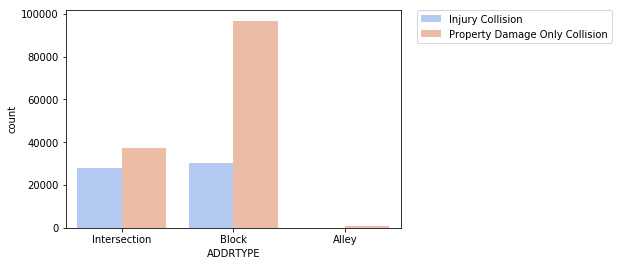

In [12]:
sns.countplot(x=df_sc['ADDRTYPE'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looking at the differences in severity at intersections versus blocks, it appears that these would be good attributes to include in our model.<br><br>
**Collision Type**

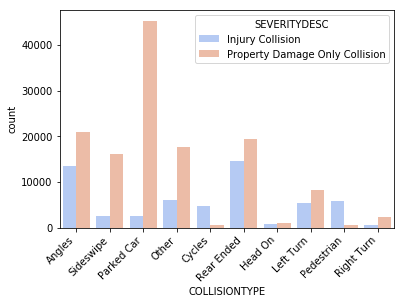

In [13]:
ax = sns.countplot(x=df_sc['COLLISIONTYPE'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In looking at the graph above, it is evident that the type of collision impacts the severity. While some collisions, such as those involving a parked car are very prevalent, they usually only result in property damage. However, collisions involving pedestrians or rear ended collisions are far more likely to result in injury. Thus, these attributes would also be helpful in our model.<br><br>
**Junction Type**

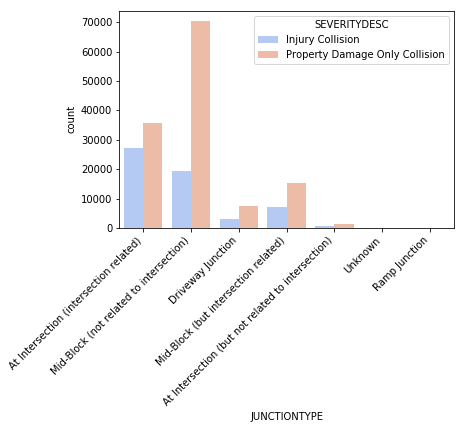

In [14]:
ax = sns.countplot(x=df_sc['JUNCTIONTYPE'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Of the two most prevalent junction types, intersections and mid-block, it is again evident that this impacts severity as there is much more likely to be an injury at an intersection versus mid-block. However, this information appears to be redundant as the attribute address type already provided us with this information. Therefor, this attribute will not be used in the model.
<br><br>
**Number of people, pedestrians, bicycles and vehicles**<br>
As these are all continuous variable integers, let's examine their range and distribution.

In [15]:
df_sc[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780
std,1.345929,0.198150,0.167413,0.631047
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000


There are evidently some outliers in the dataset given the difference between the maximum number and the 75% number. The vast majority of collisions seem to involve 2-3 people and 2 vehicles without much variation. As the collision type attribute already identifies if there was a pedestrian or bicycle involved, these attributes do not seem to add much information and will not be used in the model. <br><br>
**Month**

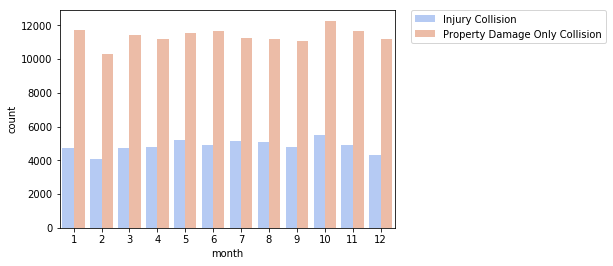

In [16]:
df_sc['month']=df_sc['INCDTTM'].dt.month
sns.countplot(x=df_sc['month'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

While there might be a slight trend of a higher proportion of collisions in winter time being slightly more likely to result in property damage than injury, for the most part, the severity doesn't seem to be impacted significantly by the time of year. This does not seem like an effective attribute to use in the model.<br><br>
**Day of the Week**

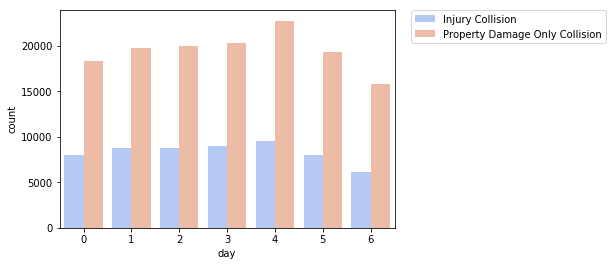

In [17]:
df_sc['day']=df_sc['INCDTTM'].dt.dayofweek
sns.countplot(x=df_sc['day'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The day of the week does not seem to have much impact on severity and will not be used in the model.<br><br>
**Time of Day**

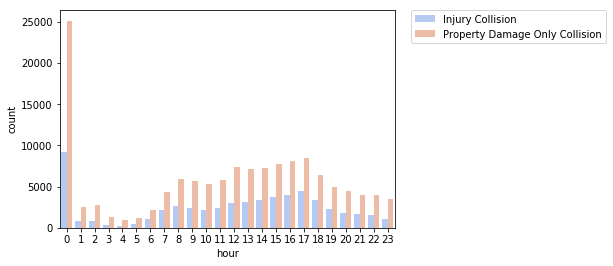

In [18]:
df_sc['hour']=df_sc['INCDTTM'].dt.hour
sns.countplot(x=df_sc['hour'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It appears as though the time was not recorded in many instances, so let's remove hour 0 so that we can more easily observe any trends.

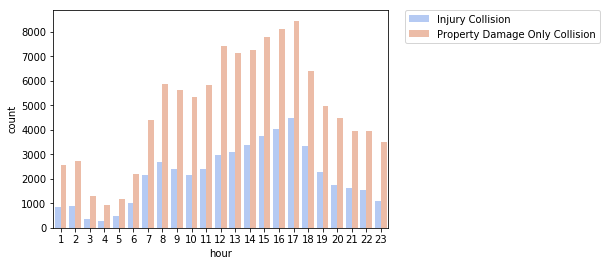

In [19]:
df_sc1 = df_sc[(df_sc['INCDTTM'].dt.hour != 0)]
sns.countplot(x=df_sc1['hour'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

While time of day obviously has an impact on the number of collisions occuring, it is more difficult to determine the impact on collision severity. It seems like there might be slightly less chance of injury from 7pm to 5am, but there doesn't appear to be enough of a difference to make this attribute useful in our model.<br><br>
**Inattention**

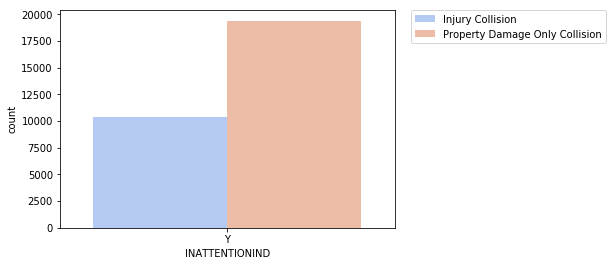

In [20]:
sns.countplot(x=df_sc['INATTENTIONIND'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Inattention has many blank entries as it is probably only recorded when the cause of accident was thought to be driver inattention. It is surprising that the ratio for the severity does not seem to be affected by driver inattention, making this an unsuitable attribute for the model as well.<br><br>
**Under the influence of drugs or alcohol**

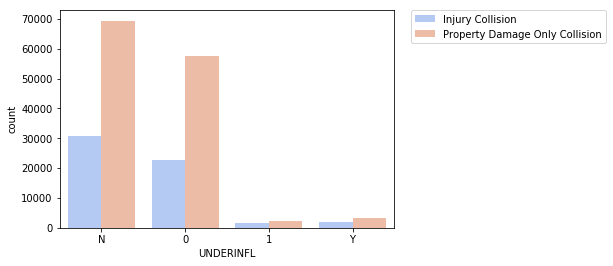

In [21]:
sns.countplot(x=df_sc['UNDERINFL'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

While the reporting format was inconsistent for this attribute, it is evident that there are very few cases involving being under the influence of drugs or alcohol. Again, surprisingly, for the cases that are recorded as a driver being under the influence, it does not appear to impact severity and thus will not be used as an attribute in the model.<br><br>
**Weather**

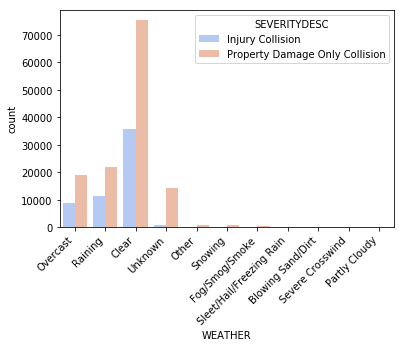

In [22]:
ax = sns.countplot(x=df_sc['WEATHER'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The only category under weather that appears to have an impact on collision severity is "Unknown" so weather will not be used as an attribute for the model.<br><br>
**Road Condition**

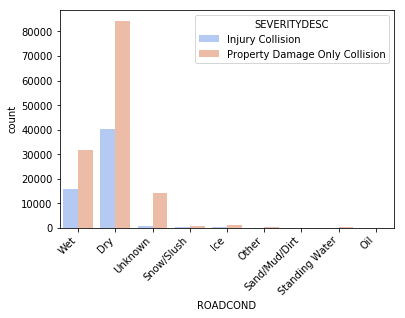

In [23]:
ax = sns.countplot(x=df_sc['ROADCOND'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Similar to weather, the only category that seems to have an impact on severity is "Unknown" so road condition will also not be used in the model. <br><br>
**Light Conditions**

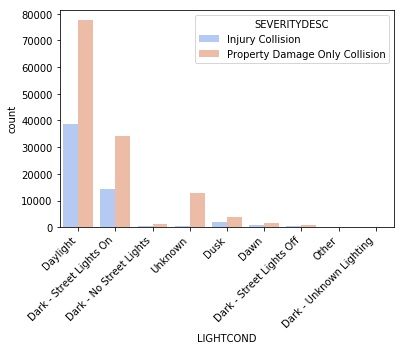

In [24]:
ax = sns.countplot(x=df_sc['LIGHTCOND'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Again, like weather and road conditions, the only category that appears to affect collision severity is "Unknown", so we will not use this attribute in our model.<br><br>
**Pedestrian Right of Way Not Granted**

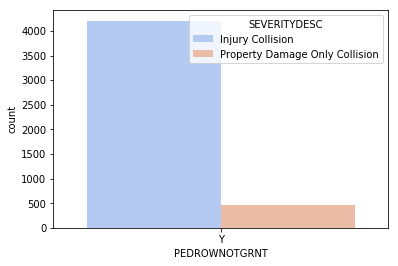

In [25]:
sns.countplot(x=df_sc['PEDROWNOTGRNT'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.show()

While the number of collisions where the pedestrian right of way was not granted is very small, it is evident that if this does occur, there is a strong effect on severity, with a much higher likelihood of injury. Therefor, this attribute will be used in the model.<br><br>
**Speeding**

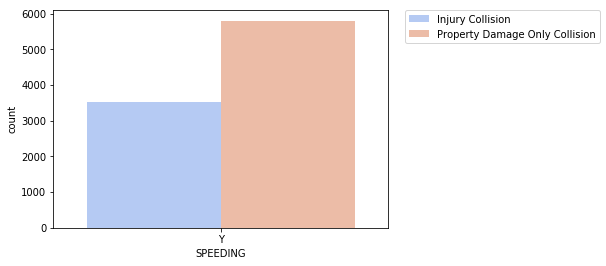

In [26]:
sns.countplot(x=df_sc['SPEEDING'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

While there are a minority of instances where speeding was a factor in the collision, it does appear to modestly impact severity. Thus, this factor will be used in the model.<br><br>
**Hit Parked Car**

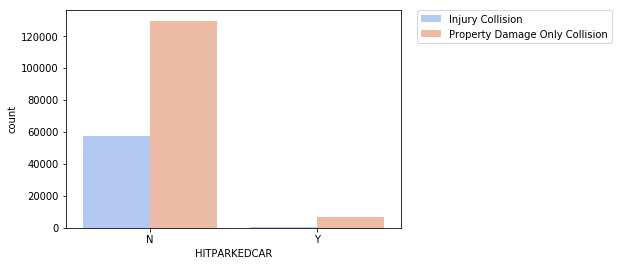

In [27]:
sns.countplot(x=df_sc['HITPARKEDCAR'], hue=df_sc['SEVERITYDESC'], palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

While it is clear that hitting a parked car does impact severity, this attribute is already part of the collision type attribute and using this additional attribute in the model would be redundant. This brings us to the end of our attribute list.<BR><BR>
**Final attribute list to be used in machine learning model**<br>
While many of the attributes examined would be useful in determining the likelihood (i.e. number) of collisions based on time, place, or environmental conditions, fewer attributes seem to impact collision severity. The following attributes and associated categories have been determined to have an impact on collision severity and will be used in various machine learning models to determine which one is best at predicting collision severity.
- Address Type: Block, Intersection
- Collision Type: Angles, Sideswipe, Parked Car, Other, Cycles, Rear Ended, Head On, Left Turn, Pedestrian, Right Turn
- Pedestrian Right of Way Not Granted
- Speeding

## Pre-processing of the Data
Within the chosen attribute columns, there are blank entries that need to be addressed. We also need to convert all categorical features to numerical values and balance the dataset.

**New Dataset**<br>
First, let's create a new dataframe with only the needed attributes.

In [28]:
df = df_sc[['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'PEDROWNOTGRNT', 'SPEEDING']]
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,Angles,NaN,NaN
1,1,Block,Sideswipe,NaN,NaN
2,1,Block,Parked Car,NaN,NaN
3,1,Block,Other,NaN,NaN
4,2,Intersection,Angles,NaN,NaN


**Blank Entries**<br>
For the attributes "Address Type" and "Collision Type" there are very few blank entries as a percentage of the overall dataset, so these rows will simply be eliminated. While there are many blank entries for "Pedestrian Right of Way Not Granted" and "Speeding", this is because it is only noted when it is a factor. Thus all the blank entries can assumed to be "N" as opposed to the entered "Y".

In [29]:
df = df.dropna(how='any', subset=['ADDRTYPE', 'COLLISIONTYPE'])
df.isna().sum()

SEVERITYCODE          0
ADDRTYPE              0
COLLISIONTYPE         0
PEDROWNOTGRNT    183289
SPEEDING         178672
dtype: int64

**Convert categorical values to numerical values**<br>
For "Severity Code", "Pedestrian right of way not granted" and "Speeding" there are only two variables, so we can simply replace them with a 0 and 1. "Address Type" and "Collision Type" have multiple values, so we will use one hot encoding to convert those categorical variables to binary variables and then append them to the dataframe.

In [30]:
df['SEVERITYCODE'].replace(to_replace=[1,2], value=[0,1], inplace=True)
df['PEDROWNOTGRNT']=df['PEDROWNOTGRNT'].fillna(0)
df['PEDROWNOTGRNT'].replace(to_replace=['Y'], value=[1], inplace=True)
df['SPEEDING']=df['SPEEDING'].fillna(0)
df['SPEEDING'].replace(to_replace=['Y'], value=[1], inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDROWNOTGRNT,SPEEDING
0,1,Intersection,Angles,0,0
1,0,Block,Sideswipe,0,0
2,0,Block,Parked Car,0,0
3,0,Block,Other,0,0
4,1,Intersection,Angles,0,0


In [31]:
df = pd.concat([df,pd.get_dummies(df['ADDRTYPE'])], axis=1)
df.drop(['ADDRTYPE'], axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
df.drop(['COLLISIONTYPE'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,PEDROWNOTGRNT,SPEEDING,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


**Balance target data**<br>
There are far more collisions that result in property damage than in injury. Thus, when the classification model is trained, it will be biased. As our dataset is so large, we can correct this by undersampling. Undersampling will randomly delete some of the rows from the property damage only observations so that we will have equal numbers of property damage and injury observations.

In [32]:
df['SEVERITYCODE'].value_counts()

0    130973
1     56977
Name: SEVERITYCODE, dtype: int64

In [33]:
#Undersample in order to balance the dataset
#Shuffle the dataset
df_shuffled = df.sample(frac=1,random_state=4)
#Put all injury rows in a separate dataset
df_injury = df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 1]
#Randomly select 58,188 observations from the property damage only collisions
df_pdonly = df_shuffled.loc[df_shuffled['SEVERITYCODE'] == 0].sample(n=56977, random_state=42)
#Concatenate both dataframes
df1 = pd.concat([df_injury, df_pdonly])
df1['SEVERITYCODE'].value_counts()

1    56977
0    56977
Name: SEVERITYCODE, dtype: int64

### Classification
We will now split the data into training and testing sets to build an accurate machine learning model. We will then train and test the classification algorithms:
- K Nearest Neighbout(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression<br>
<br>
Each model will be tested to determine the Jaccard similarity score and F1 score. The Jaccard similarity score measures the similarity between the training and test sets. The closer to 1.0, the better the similarity. The F1 score is the weighted average of the precision and recall and also has a best value of 1.0.

In [34]:
from sklearn import preprocessing
from sklearn import metrics
import itertools

First we need to define our attribute set X and target variable y.

In [42]:
y=df1['SEVERITYCODE']
X=df1.drop(['SEVERITYCODE'], axis=1)

Now split the dataset into training and testing sets.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91163, 15) (91163,)
Test set: (22791, 15) (22791,)


**K Nearest Neighbor(KNN)**<br>
We first need to determine the best k to use.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.67131763, 0.63235488, 0.68636743, 0.67412575, 0.69202755,
       0.68781537, 0.68957044, 0.69483568, 0.69825808, 0.66008512,
       0.69909175, 0.69733667, 0.68961432, 0.6974683 ])

We will now build our model with k=11 as this had the highest accuracy

In [47]:
kNN_model = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

Evaluate the KNN model using the test set.

In [48]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [49]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.70
KNN F1-score: 0.70


**Decision Tree**<br>
Use a max depth of 4 as we had four original attributes

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Evaluate the Decision Tree model using the test set.

In [51]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.68
DT F1-score: 0.67


**Support Vector Machine**<br>
First we need to choose what would be the best kernel to use.

In [52]:
from sklearn import svm
#Choose best kernel
kernelSVC = ['linear', 'poly', 'rbf','sigmoid']
for ker in kernelSVC:
    clf = svm.SVC(kernel = ker, gamma='auto')
    clf = clf.fit(X_train, y_train)
    yhat3 = clf.predict(X_test)
    score3 = metrics.accuracy_score(y_test, yhat3)
    print(ker, score3)

linear 0.6983019613005134
poly 0.6983019613005134
rbf 0.6988723618972401
sigmoid 0.6961958667895222


While they were all fairly similar, the rbf kernel had the highest accuracy score, so we will use that kernel to train the model.

In [53]:
SVM_model = svm.SVC(kernel='rbf', gamma = 'auto')
SVM_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Evaluate the Support Vector Machine model using the test set.

In [54]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.70
SVM F1-score: 0.70


**Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.70
LR F1-score: 0.70
LR LogLoss: 0.56


Decision Tree and Logistic Regression models are very fast to compute while SVM and KNN require a long time to train. Logistic Regression, SVM and KNN all had identical Jaccard similarity scores and F1 scores of 0.70, while the decision tree model was lower. Given this, I would recommend a Logistic Regression model to the City of Seattle to use in predicting collision severity.